In [1]:
## Sampling with replacement

In [4]:
# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
# 4. a ipython magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline

import numpy as np
import pandas as pd
# seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

In [ ]:
# setup the look and feel of the notebook
plt.rcParams['figure.figsize'] = 8, 6
sns.set_context('notebook', font_scale = 1.5, rc = {'lines.linewidth': 2.5})
sns.set_style('whitegrid')
sns.set_palette('deep')

# Create a couple of colors to use throughout the notebook
red = sns.xkcd_rgb['vermillion']
blue = sns.xkcd_rgb['dark sky blue']

In [ ]:
Ideally, the reader should already understand or vaguely remember the statistic concepts such as z-score, p-value, hypothesis test, confidence interval. The warming-up section is a quick review of the concept, feel free to skip it if you're already acquainted with the concept.

# Warming Up

Statistical inference is the process of analyzing sample data to gain insight into the population from which the data was collected and to investigate differences between data samples. In data analysis, we are often interested in the characteristics of some large population, but collecting data on the entire population may be infeasible. For example, leading up to U.S. presidential elections it could be very useful to know the political leanings of every single eligible voter, but surveying every voter is not feasible. Instead, we could poll some subset of the population, such as a thousand registered voters, and use that data to make inferences about the population as a whole.

## Point Estimate

Point estimates are estimates of population parameters based on sample data. For instance, if we wanted to know the average age of registered voters in the U.S., we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole. The average of a sample is known as the sample mean. The sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. Let's investigate point estimates by generating a population of random age data and then drawing a sample from it to estimate the mean:

In [5]:
population_ages1 = stats.poisson.rvs(loc = 18, mu = 35, size = 150000)
population_ages2 = stats.poisson.rvs(loc = 18, mu = 10, size = 100000)
population_ages = np.concatenate((population_ages1, population_ages2))
print('population mean:', np.mean(population_ages))

('population mean:', 43.011071999999999)


In [7]:
np.random.seed(6)
sample_ages = np.random.choice(population_ages, size = 500)
print('sample mean:', np.mean(sample_ages))

('sample mean:', 42.670000000000002)


np.random.random(population_ages)

The experiment tells us that we'd expect the distribution of the population to be a similar shape to that of the sample, so we can assume that the mean of the sample and the population should have the same value. Note that we can't say that they exactly match, but it's the best estimate we can make.
The population mean is often denoted as $\mu$, the estimated population mean as $\hat{\mu}$, mean of the sample $\bar{x}$. So here we're basically saying $\hat{\mu} = \bar{x}$, where we're using the sample mean to estimate the mean of the population and usually the larger the size of our sample, the more accurate our point estimator for the estimated population mean is going to be.


## Sampling Distributions and The Central Limit Theorem

Many statistical procedures assume that data follows a normal distribution, because the normal distribution has nice properties like symmetricity and having the majority of the data clustered within a few standard deviations of the mean. Unfortunately, real world data is often not normally distributed and the distribution of a sample tends to mirror the distribution of the population. This means a sample taken from a population with a skewed distribution will also tend to be skewed.

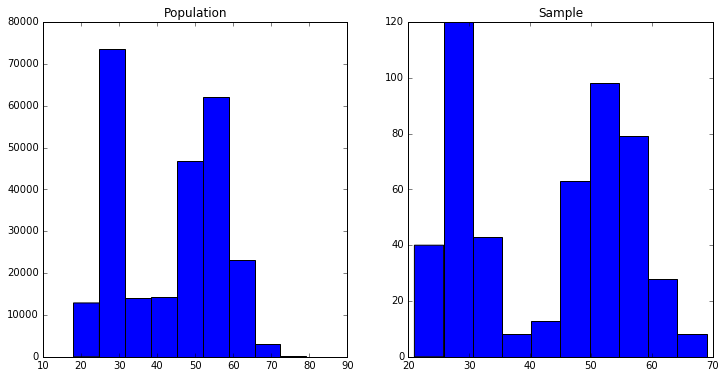

In [13]:
fig = plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.hist(population_ages)
plt.title('Population')
plt.subplot(1, 2, 2)
plt.hist(sample_ages)
plt.title('Sample')
plt.show()

The plot reveals the data is clearly not normal: instead of one symmetric bell curve, it has as bimodal distribution with two high density peaks. Because of this, the sample we drew from this population should have roughly the same shape and skew.
The sample has roughly the same shape as the underlying population. This suggests that we can't apply techniques that assume a normal distribution to this data set, since it is not normal. This leads to our next topic, the central limit theorem.
The central limit theorem is one of the most important results of probability theory and serves as the foundation of many methods of statistical analysis. At a high level, the theorem states the distribution of many sample means, known as a sampling distribution, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed. As a result we can treat the sample mean as if it were drawn normal distribution. To illustrate, let's create a sampling distribution by taking 200 samples from our population and then making 200 point estimates of the mean:

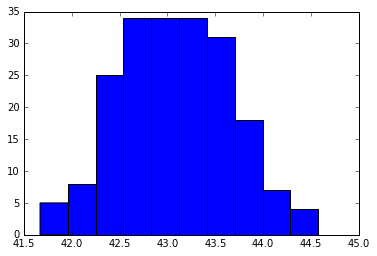

In [14]:
np.random.seed(10)
samples = 200
point_estimates = [np.random.choice(population_ages, size = 500).mean()
                   for _ in range(samples)]

plt.hist(point_estimates)
plt.show()

In [19]:
[np.random.choice(population_ages, size = 500) for _ in range(samples)]

[array([25, 33, 54, 53, 46, 26, 57, 24, 47, 47, 60, 29, 25, 25, 49, 60, 55,
        54, 54, 58, 46, 50, 52, 31, 33, 54, 49, 30, 47, 54, 33, 30, 55, 45,
        56, 29, 39, 51, 31, 49, 27, 54, 58, 64, 49, 31, 31, 54, 35, 64, 44,
        29, 54, 24, 51, 46, 56, 49, 50, 53, 51, 60, 29, 56, 29, 63, 60, 61,
        50, 26, 51, 22, 49, 58, 30, 56, 27, 48, 26, 55, 55, 25, 27, 59, 29,
        25, 30, 45, 35, 47, 52, 49, 50, 28, 54, 54, 63, 30, 56, 51, 29, 57,
        33, 33, 32, 50, 49, 51, 56, 24, 30, 62, 44, 33, 62, 55, 32, 52, 25,
        44, 61, 60, 50, 54, 24, 59, 26, 31, 46, 28, 64, 29, 32, 31, 48, 27,
        62, 30, 26, 58, 29, 56, 55, 29, 59, 47, 59, 50, 27, 35, 31, 55, 62,
        25, 51, 55, 34, 26, 25, 28, 28, 27, 52, 27, 55, 30, 53, 55, 48, 63,
        27, 54, 27, 22, 54, 26, 31, 52, 54, 24, 53, 31, 25, 25, 56, 46, 54,
        53, 56, 51, 27, 28, 30, 52, 51, 26, 57, 61, 22, 28, 57, 61, 24, 54,
        29, 24, 26, 47, 56, 29, 49, 52, 48, 54, 57, 46, 55, 49, 53, 52, 52,
        58, 

The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples were drawn from. In addition, the mean of the sampling distribution approaches the true population mean:

To hit the notion home, Central Limit Theorem states that that if we collect "a large number" of different samples mean from the population, the sampling distribution, the distribution of the samples mean you collected, will approximately take the shape of a normal distribution around the population mean no matter what the orginal population distribution is.
Knowing that the sampling distribution will take the shape of a normal distribution is what makes the theorem so powerful, as it is the foundation of concepts such as confidence intervals and margins of error in frequentist statistics.

## Confidence Interval

A point estimate can give us a rough idea of a population parameter like the mean, but estimates are prone to error. A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, we'd set our confidence level to 95%. Higher confidence levels result in a wider confidence intervals.
The interval is computed using the formula:
$$\text{point estimate} \pm z * SE$$
Where
$z$ is called the critical value and it corresponds to the confidence level that we chose. Critical value is the number of standard deviations we'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level. For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations from the mean, so we could use 2 as the z-critical value for a 95% confidence interval (although it is more exact to get z-critical values with stats.norm.ppf())
$SE$ represents the standard error. Generally the standard error for a point estimate is estimated from the data and computed using a formula. For example, the standard error for the sample mean is $\frac{s}{ \sqrt{n} }$, where $s$ is the standard deviation and $n$ is the number of samples.
The value $z * SE$ is called the margin of error.
Note that this constructing confidence intervals framework holds true for doing can be easily adapted for any estimator that has a nearly normal sampling distribution. e.g. sample mean, two sample mean, sample proportion and two sample proportion (we'll later see). All we have to do this is change the way that we're calculating the standard error.

In [23]:
from scipy.stats import norm
norm.ppf(0.95)

1.6448536269514722

In [25]:
norm.cdf(1.68)

0.95352134213627993

In [30]:
np.sqrt(1000)

31.622776601683793

In [33]:
np.random.seed(10)
sample_size = 1000
sample = np.random.choice(population_ages, size = sample_size)
sample_mean = sample.mean()

confidence = 0.95
z_critical = stats.norm.ppf(q = confidence + (1 - confidence) / 2)
print('z-critical value:', z_critical)                     

pop_stdev = population_ages.std()
margin_of_error = z_critical * (pop_stdev / np.sqrt(sample_size))
confident = sample_mean - margin_of_error, sample_mean + margin_of_error
print('point esimate:', sample_mean)
print('Confidence interval:', confident)

('z-critical value:', 1.959963984540054)
('point esimate:', 42.191000000000003)
('Confidence interval:', (41.370970000233839, 43.011029999766166))


Notice that the confidence interval we calculated captures the true population mean of 43.0023. Let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean:

In [39]:
np.random.seed(10)
sample_size = 1000
sample = np.random.choice(population_ages, size = sample_size)
sample_mean = sample.mean()

confidence = 0.99
z_critical = stats.norm.ppf(q = confidence + (1 - confidence) / 2)
print('z-critical value:', z_critical)                     

pop_stdev = population_ages.std()
margin_of_error = z_critical * (pop_stdev / np.sqrt(sample_size))
confident = sample_mean - margin_of_error, sample_mean + margin_of_error
print('point esimate:', sample_mean)
print('Confidence interval:', confident)

('z-critical value:', 2.5758293035489004)
('point esimate:', 42.191000000000003)
('Confidence interval:', (41.113297899426676, 43.268702100573329))


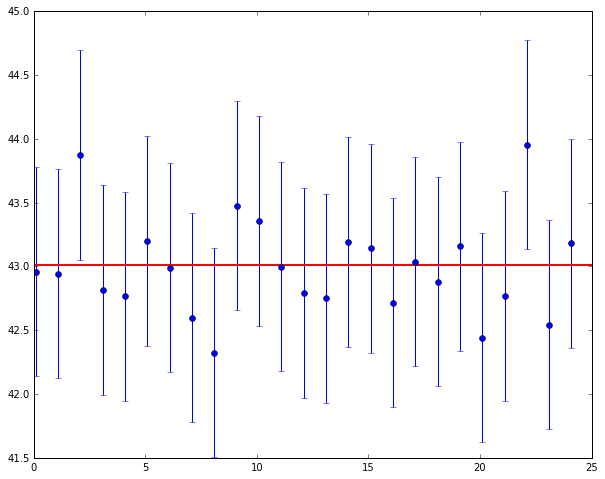

In [41]:
np.random.seed(12)
confidence = 0.95
sample_size = 1000

intervals = []
sample_means = []
for sample in range(25):
    sample = np.random.choice(population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = confidence + (1 - confidence) / 2)                    
    pop_stdev = population_ages.std()
    margin_of_error = z_critical * (pop_stdev / np.sqrt(sample_size))
    confint = sample_mean - margin_of_error, sample_mean + margin_of_error 
    intervals.append(confint)
    

plt.figure(figsize = (10, 8))
plt.errorbar(x = np.arange(0.1, 25, 1), y = sample_means, 
             yerr = [(top - bot) / 2 for top, bot in intervals], fmt = 'o')

plt.hlines(xmin = 0, xmax = 25,
           y = population_ages.mean(), 
           linewidth = 2.0, color = 'red')
plt.show()


Notice that in the plot above, all but one of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the time.
More formally, the definition of a 95% confidence interval means that 95% of confidence intervals, created based on random samples of the same size from the same population will contain the true population parameter.

## Hypothesis Testing

Lets starts off with a motivating example that asks the question "If you toss a coin 30 times and see 22 heads, is it a fair coin?"
We all know that a fair coin should come up heads roughly 15 out of 30 tosses, give or take, so it does seem unlikely to see so many heads. However, the skeptic might argue that even a fair coin could show 22 heads in 30 tosses from time-to-time. This could just be a chance event. So, the question would then be "how can you determine if we're tossing a fair coin?"
Let's start by first considering the probability of a single coin flip coming up heads and work our way up to 22 out of 30.
$$\begin{align}
P(H) = \frac{1}{2}
\end{align}$$
As our equation shows, the probability of a single coin toss turning up heads is exactly 50% since there is an equal chance of either heads or tails turning up. Taking this one step further, to determine the probability of getting 2 heads in a row with 2 coin tosses, we would need to multiply the probability of getting heads by the probability of getting heads again since the two events are independent of one another.
$$\begin{align}
P(HH) = P(H) \cdot P(H) = P(H)^2 = \left(\frac{1}{2}\right)^2 = \frac{1}{4}
\end{align}$$
Let's now take a look at a slightly different scenario and calculate the probability of getting 2 heads and 1 tails with 3 coin tosses. To get the actual probability of tossing 2 heads and 1 tails we will have to add the probabilities for all of the possible permutations, of which there are exactly three: HHT, HTH, and THH.
$$\begin{align}
P(2H,1T) = P(HHT) + P(HTH) + P(THH) = \frac{1}{8} + \frac{1}{8} + \frac{1}{8} = \frac{3}{8}
\end{align}$$
Another way we could do this is to use the binomial distribution:
$$\begin{align}
P(N_H,N_T) = \binom{n}{k} p^{k} \left( 1 - p \right)^{n - k}
\end{align}$$
Where
$n$ is number of coin flips
$p$ is the probability of getting heads on each flip
The $\binom{n}{k}$ tells us how many ways are there to get $k$ heads our of $n$ total number of coin flips?" and the $p^k(1-p)^{n-k}$ answers the question "how likely is any given $k$ heads and $n-k$ tails?", multiply them together and we get the probability of getting exactly $k$ heads.
Now that we understand the classic method, let's use it to test whether we are actually tossing a fair coin.

In [44]:
k_range = range(1, 31)  # number of heads appearing
n = 30  # number of k_range tossing the coin
p = 0.5  # probability of coin appearing up as head

prob = stats.binom(n = n, p = p).pmf(k = k_range)
prob


array([  2.79396772e-08,   4.05125320e-07,   3.78116965e-06,
         2.55228952e-05,   1.32719055e-04,   5.52996062e-04,
         1.89598650e-03,   5.45096118e-03,   1.33245718e-02,
         2.79816007e-02,   5.08756377e-02,   8.05530930e-02,
         1.11535052e-01,   1.35435420e-01,   1.44464448e-01,
         1.35435420e-01,   1.11535052e-01,   8.05530930e-02,
         5.08756377e-02,   2.79816007e-02,   1.33245718e-02,
         5.45096118e-03,   1.89598650e-03,   5.52996062e-04,
         1.32719055e-04,   2.55228952e-05,   3.78116965e-06,
         4.05125320e-07,   2.79396772e-08,   9.31322575e-10])

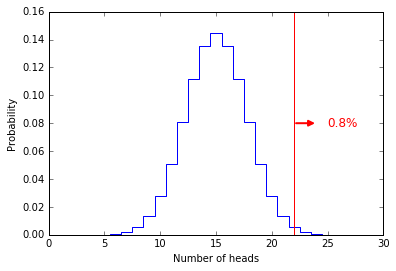

In [48]:
# Calculate the probability for every possible outcome
# of tossing a fair coin 30 k_range

k_range = range(1, 31)  # number of heads appearing
n = 30  # number of k_range tossing the coin
p = 0.5  # probability of coin appearing up as head

prob = stats.binom(n = n, p = p).pmf(k = k_range)

# Plot the probability distribution using the probabilities list 
# we created above.
plt.step(k_range, prob, where = 'mid', color = 'blue')
plt.xlabel('Number of heads')
plt.ylabel('Probability')
plt.plot((22, 22), (0, 0.1599), color = 'red')
plt.annotate('0.8%', xytext = (25, 0.08), xy = (22, 0.08), 
             va = 'center', color = 'red', size = 'large',
             arrowprops = {'arrowstyle': '<|-', 'lw': 2,
                           'color': 'red', 'shrinkA': 10})
plt.show()


The visualization above shows the probability distribution for flipping a fair coin 30 times. Using this visualization we can now determine the probability of getting, say for example, 12 heads in 30 flips, which looks to be about 8%. Notice that we've labeled our example of 22 heads as 0.8%. If we look at the probability of flipping exactly 22 heads, it looks likes to be a little less than 0.8%, in fact if we calculate it using the function from above, we get 0.5%.

In [54]:
prob = stats.binom(n = n, p = p).pmf(k = 22)
print('Probability of flipping 22 heads: {:0.1f}%'.format(prob * 100))

Probability of flipping 22 heads: 0.5%


So, then why do we have 0.8% labeled in our probability distribution above? Well, that's because we are showing the probability of getting at least 22 heads, which is also known as the p-value.
Let's pull back from our example and discuss formally about hypothesis testing. In standard frequentist statistic's hypothesis testing, we start with a null hypothesis that we usually call $H_0$ (pronouced as H naught), which represents our status quo. On the other hand, we also have an alternative hypothesis our $H_1$ that represents the question that we wish to answer, i.e. what we’re testing for.
After setting up our null and alternative hypothesis, we conduct a hypothesis test under the assumption that the null hypothesis is true. If the test results suggest that the data do not provide convincing evidence for the alternative hypothesis, we stick with the null hypothesis. If they do, then we reject the null hypothesis in favor of the alternative.
Frequentist statistic's hypothesis testing uses a p-value to weigh the strength of the evidence (what the data is telling you about the population). p-value is defined as the probability of obtaining the observed or more extreme outcome, given that the null hypothesis is true (not the probability that the alternative hypthesis is true). It is a number between 0 and 1 and interpreted in the following way:
A small p-value (typically <= 0.05, 0.05 is a commonly used threshold, the threshold is often denoted as $\alpha$) indicates strong evidence against the null hypothesis, so we reject the null hypothesis. This means that something interesting is going on and it’s not just noise!
A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so we fail to reject the null hypothesis. Although p-value is still in our favor, we cannot conclusively say that it was not due to random noise.
p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). If you carefully read good papers on these kind of topics, you will always see the p-values being reported so that the readers can draw their own conclusions.
Example:
Let's say that a pizza place claims their delivery times are 30 minutes or less on average. Now we think it's actually takes more than 30 minutes. We conduct a hypothesis test because we believe the null hypothesis, that the mean delivery time is 30 minutes maximum, is incorrect. This means that our alternative hypothesis is the mean time is greater than 30 minutes. We randomly sample some delivery times and run the data through the hypothesis test, and our p-value turns out to be 0.01, which is much less than 0.05.
In real terms, there is a probability of 0.001 that we will mistakenly reject the pizza place's claim that their delivery time is less than or equal to 30 minutes. Since typically we are willing to reject the null hypothesis when this probability is less than 0.05, we conclude that the pizza place is wrong; their delivery times are in fact more than 30 minutes on average.
Back with our coin toss example, the null hypothesis assumes we have a fair coin, and the way we determine if this hypothesis is true or not is by calculating how often flipping this fair coin 30 times would result in 22 or more heads. If we then take the number of times that we got 22 or more heads and divide that number by the total of all possible permutations of 30 coin tosses, we get the probability of tossing 22 or more heads with a fair coin. This probability is essentially our p-value.

In [55]:
def compute_pvalue(n, k, p):
    """Returns the p-value for binomial distribution"""
    k_range = range(k, n + 1)
    pvalue = stats.binom(n = n, p = p).pmf(k = k_range).sum()
    return pvalue


pvalue = compute_pvalue(n = 30, k = 22, p = 0.5)
print('P-value: {:0.1f}%'.format(pvalue * 100))

P-value: 0.8%


The role of p-value is used to check the validity of the null hypothesis. The way this is done is by agreeing upon some predetermined upper limit for our p-value, below which we will assume that our null hypothesis is false.
In other words, if our null hypothesis were true, and 22 heads in 30 flips could happen often enough by chance, we would expect to see it happen more often than the given threshold percentage of times. So, for example, if we chose 10% as our p-value threshold, then we would expect to see 22 or more heads show up at least 10% of the time to determine that this is a chance occurrence and not due to some bias in the coin. Historically, the generally accepted threshold has been 5%, and so if our p-value is less than 5%, we can then make the assumption that our coin may not be fair.
Running the code above gives us a p-value of roughly 0.8%, which matches the value in our probability distribution above and is also less than the 5% threshold needed to reject our null hypothesis, so it does look like we may have a biased coin.


In [56]:
# we can also use the binom_test function from scipy to
# perform the hypothesis testing
pvalue = stats.binom_test(x = 22, n = 30, p = 0.5, alternative = 'greater')
print('P-value: {:0.1f}%'.format(pvalue * 100))

P-value: 0.8%


## Simulation

Instead of using the stastistical approach, the code below seeks to answer the same question of whether or not our coin is fair by running a large number of simulated coin flips and calculating the proportion of these experiments that resulted in at least 22 heads or more.

In [59]:
def coin_toss(n_simulation = 100000):
    """
    computing a fair coin resulting in at
    least 22 heads or more through simulation
    """
    pvalue = 0
    for i in range(n_simulation):
        # trials: 1 denotes head, 0 denotes tail
        trials = np.random.randint(2, size = 30)
        if trials.sum() >= 22:
            pvalue += 1

    pvalue /= n_simulation
    return pvalue


pvalue = coin_toss()
print('Simulated P-value: {:0.1f}%'.format(pvalue * 100))

Simulated P-value: 0.0%


## Frequentist A/B testing

A/B testing is essentially a simple randomized trial. Randomized trials are (usually) considered the gold standard study design for evaluating the efficacy of new medical treatments, but they are also used much more widely in experimental research.
For example, when someone visits a website, the site sends them to one of two (or possibly more) different landing or home pages, and which one they are sent to is chosen at random. The purpose is to determine which page version generates a superior outcome, e.g. which page generates more advertising revenue, or which which page leads a greater proportion of visitors to continue visiting the site.
The key idea is that because we randomize which landing page (or treatment in the case of a randomized clinical trial) someone goes to, after a large number of visitors, the groups of people who visited the two pages are completely comparable in respect of all characteristics (e.g. age, gender, location, and anything else you can think of!). Because the two groups are comparable, we can compare the outcomes (e.g. amount of advertising revenue) between the two groups to obtain an unbiased, and fair, assessment of the relative effectiveness (in terms of our defined outcome) of the two designs.
Suppose for the moment that we've had two visitors to our site, and one visitor has been randomized to page A, and the other visitor to page B (note that it is entirely possible, with simple randomization, that both visitors could have both been sent to page A). Suppose next that the visitor to page A generated revenue, but the visitor to page B generated no revenue. Should we conclude that page A is superior to page B, in terms of revenue generation? Of course not. Because we have only sampled two visitors, it is entirely possible that the visitor to page A would have generated revenue even if they had been sent to page B, perhaps because they are very interested in the site's content, whereas perhaps the visitor to page B was not particularly interested in the site content, and was never going to generate revenue. We can overcome this problem by running the A/B testing for a sufficiently large number of visitors, such that the probability that the scenario described above is sufficiently small.
Scenario: We ran an A/B test with two different versions of a web page, a and b, for which we count the number of visitors and whether they convert or not. We can summarize this in a contingency table showing the frequency distribution of the events:

In [60]:
data = pd.DataFrame({
    'version': ['A', 'B'],
    'not_converted': [4514, 4473],
    'converted': [486, 527]
})[['version', 'not_converted', 'converted']]
data

,version,not_converted,converted
0,A,4514,486
1,B,4473,527


It is trivial to compute the conversion rate of each version, 486/(486 + 4514) = 9.72% for a and 10.5% for b. With such a relatively small difference, however, can we convincingly say that the version b converts better? To test the statistical significance of a result like this, a hypothesis testing can be used.


## Comparing Two Proportions

et's formalize our thought process a little bit, suppose that we have obtained data from n visitors, $n_A$ of which have been (randomly) sent to page A, and $n_B$ of which have been sent to page B. Further, let $X_A$ and $X_B$ denote the number of visitors for whom we obtained a 'successful' outcome in the two groups. The proportion of successes in the two groups is then given by $\hat{p_A} = X_A/n_A$ and $\hat{p_B} = X_B/n_B$ respectively. The estimated difference in success rates is then give by the difference in proportions: $\hat{p_A} - \hat{p_B}$:
To assess whether we have statistical evidence that the two pages' success rates truely differ, we can perform a hypothesis test. The null hypothesis that we want to test is that the two pages' true success rates are equal, whereas the alternative is that they differ (one is higher than the other). If $p_A$ = the proportion of the page A population whom we obtained a successful outcome and $p_B$ = the proportion of the page B population whom we obtained a successful outcome then we are interested in testing the following hypothesis:
$$\begin{align}
H_0:p_A = p_B \text{ versus } H_A: p_A \neq p_B
\end{align}$$
Or put it in another way, the null hypothesis says that the factors 'page type' and 'outcome' are statistically independent of each other. In words, this means knowing which page someone is sent to tells you nothing about the chance that they will have a successful outcome. Now that we know what hypothesis test we're interested in, we'll have to derive the appropriate test statistic.
A test statistic is a single metric that can be used to evaluate the null hypothesis and the standard way to obtain this metric is to compute the z-score that measures how many standard deviations below or above the population mean a raw score is:
$$\begin{align}
z = \frac{x - \mu}{SE}
\end{align}$$
Where:
$\mu$ denotes the mean
$\sigma$ denotes the standard error, computed by $\frac{s}{\sqrt{n}}$, where $s$ denotes the standard error and $n$ denotes the number of samples

For our test the underlying metric is a binary yes/no variable (event), which means the appropriate test statistic is a test for differences in proportions:
$$\begin{align}
Z = \frac{ (\hat{p_A} - \hat{p_B}) - (p_A - p_B) }{SE(p_A - p_B)}
\end{align}$$

The test statistic makes sense as it measuring the difference in the observed proportions and the estimated proportion, standardized by an estimate of the standard error of this quantity.
To compute the test statistic, we first need to find the standard deviation/variance of $p_A - p_B$:


$$\begin{align}
Var(p_A - p_B)
&amp;= Var(p_A) +  Var(p_B) \\
&amp;= \frac{p_A (1 - p_A)}{n_A} + \frac{p_B (1 - p_B)}{n_B} \\
&amp;= p (1 - p) \left( \frac{1}{n_A} + \frac{1}{n_B} \right)
\end{align}$$

The first step stems from that fact that, given that we know:
The variance of a random variable X is defined as $Var(X) = E[X^2] - E[X]^2$
The covariance between two random variable X and Y is defined as $Cov(X, Y) = E[(X - u_x)(y - u_y)] = E[XY] - E[X]E[Y]$
When conducting hypothesis test, we know that the two groups should be independent of each other, i.e. the covariance between the two should be 0


$$\begin{align}
Var(X - Y)
&amp;= E[(X - Y)(X - Y)] - E[X - Y]^2 \\
&amp;= E[X^2 - 2XY + Y^2] - (u_x - u_y)^2 \\
&amp;= E[X^2 - 2XY + Y^2] - u_x^2 + 2u_xu_y - u_y^2 \\
&amp;= (E[X^2] - u_x^2) + (E[Y^2] - u_y^2) - 2(E[XY] - u_xu_y) \\
&amp;= Var(X) + Var(Y) - 2 Cov(X, Y)
\end{align}$$
We're using the property that the variance of a binomial proportion is given by: $Var(p_A) = p_A (1 - p_A) / n_A$, the same can be applied for group B
The third step comes from the fact that if we assume that the null hypothesis, $p_A = p_B$ is true, then the population proportions equal some common value $p$, that is, $p_A = p_B = p$. Since we don't know the assumed common population proportion $p$ any more than we know the proportions $p_A$ and $p_B$ of each population, we can estimate $p$ using the proportion of "successes" in the two combined, $\hat{p} = (X_A + X_B)/(n_A + n_B)$, which is commonly referred to as the pooled probability
During the third step, we utilized that fact that if we assume that the null hypothesis is true, then $p_A = p_B$, this also means $p_A - p_B = 0$. Given all of these information, the formula for our test statistic now becomes:
$$\begin{align}
Z
&amp;= \frac{ (\hat{p_A} - \hat{p_B}) - (p_A - p_B) }{SE(p_A - p_B)} \\
&amp;= \frac{ (\hat{p_A} - \hat{p_B}) - 0 }{\sqrt{\hat{p} (1 - \hat{p}) \left( \frac{1}{n_A} + \frac{1}{n_B} \right)}}
\end{align}$$
Where $\hat{p} = (X_A + X_B)/(n_A + n_B)$

In [79]:
def two_proprotions_test(success_a, size_a, success_b, size_b):
    """
    A/B test for two proportions;
    given a success a trial size of group A and B compute
    its zscore and pvalue
    
    Parameters
    ----------
    success_a, success_b : int
        Number of successes in each group
        
    size_a, size_b : int
        Size, or number of observations in each group
    
    Returns
    -------
    zscore : float
        test statistic for the two proportion z-test

    pvalue : float
        p-value for the two proportion z-test
    """
    prop_a = 1.0* success_a / size_a
    prop_b = 1.0 * success_b / size_b
    prop_pooled = 1.0 * (success_a + success_b) / (size_a + size_b)
    var = 1.0 * prop_pooled * (1 - prop_pooled) * (1.0 / size_a + 1.0 / size_b)
    zscore = 1.0* np.abs(prop_b - prop_a) / np.sqrt(var)
    one_side = 1 - stats.norm(loc = 0, scale = 1).cdf(zscore)
    pvalue = one_side * 2
    return zscore, pvalue

In [218]:
def two_proprotions_test_2(success_a, size_a, success_b, size_b):
    """
    A/B test for two proportions;
    given a success a trial size of group A and B compute
    its zscore and pvalue
    
    Parameters
    ----------
    success_a, success_b : int
        Number of successes in each group
        
    size_a, size_b : int
        Size, or number of observations in each group
    
    Returns
    -------
    zscore : float
        test statistic for the two proportion z-test

    pvalue : float
        p-value for the two proportion z-test
    """
    prop_a = 1.0* success_a / size_a
    prop_b = 1.0 * success_b / size_b
    prop_pooled = 1.0 * (success_a + success_b) / (size_a + size_b)
    var = float(prob_a) * (1 - prob_a)/size_a + float(prob_b) * (1 - prob_b)/size_b
    zscore = 1.0* np.abs(prop_b - prop_a) / np.sqrt(var)
    one_side = 1 - stats.norm(loc = 0, scale = 1).cdf(zscore)
    pvalue = one_side * 2
    return zscore, pvalue

In [119]:
success_a = 486
size_a = 5000
success_b = 527
size_b = 5000

zscore, pvalue = two_proprotions_test(success_a, size_a, success_b, size_b)
print('zscore = {:.3f}, pvalue = {:.3f}'.format(zscore, pvalue))

zscore = 1.359, pvalue = 0.174


In [142]:
from scipy import stats
X = np.random.binomial(1, 486*1.0/5000, 5000)
y = np.random.binomial(1, 527 * 1.0/5000, 5000)
stats.ttest_ind(X,y)

Ttest_indResult(statistic=0.10103114666116064, pvalue=0.91952776107435463)

In [145]:
X = stats.bernoulli.rvs(1.0*486/5000, size = 5000)
y = stats.bernoulli.rvs(1.0 * 527/5000, size = 5000)
stats.ttest_ind(X,y)

Ttest_indResult(statistic=-1.9563228341462595, pvalue=0.050454936497844466)

In [191]:
X = np.array([1] * 486 + [0] * (5000-486))
y = np.array([1] * 527 + [0] * (5000-527))

In [192]:
stats.ttest_ind(X,y)

Ttest_indResult(statistic=-1.3588403321306257, pvalue=0.17422784302176916)

In [81]:
# or we can use the implementation from statsmodels
# where we pass in the success (they call the argument counts)
# and the total number for each group (they call the argument nobs,
# number of observations)
counts = np.array([486, 527])
nobs = np.array([5000, 5000])

zscore, pvalue = proportions_ztest(counts, nobs, alternative = 'two-sided')
print('zscore = {:.3f}, pvalue = {:.3f}'.format(zscore, pvalue))

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

Based on the fact that our p-value is not smaller than the 0.05 commonly used threshold, the test statistic tells us we do not have strong evidence against our null hypothesis, i.e. we do not have strong evidence that the two pages are not equally effective.
Apart from spitting out the p-value, we will also look at forming a confidence interval for $\hat{p_A} - \hat{p_B}$. If the number of trials in both groups is large, and the observed number of successes are not too small, we can calculate a 95% confidence interval using the formula:
$$\begin{align}
\text{point estimate} \pm z * SE
&amp;= (\hat{p_A} - \hat{p_B}) \pm z * \frac{p_A (1 - p_A)}{n_A} + \frac{p_B (1 - p_B)}{n_B}
\end{align}$$
Note that when calculating the confidence interval because we no longer have the assumption that $p_A = p_B$ from our null hypothesis, thus we can't leverage this property and use the pooled probability.

In [108]:
def two_proprotions_conf(success_a, size_a, success_b, size_b, significance):
    prob_a = 1.0 * success_a / size_a
    prob_b = 1.0 * success_b/size_b
    variance =  1.0* prob_a * (1-prob_a)/size_a +  1.0*prob_b * (1-prob_b)/size_b
    # z critical value
    confidence = 1 - significance
    z = stats.norm(loc = 0, scale = 1).ppf(confidence + significance / 2)
    conf_low = prob_b - prob_a - z *np.sqrt(variance)
    conf_high = prob_b - prob_a + z * np.sqrt(variance)
    return conf_low, conf_high

In [109]:
success_a = 486
size_a = 5000
success_b = 527
size_b = 5000
significance = 0.05
conf_low, conf_high = two_proprotions_conf(success_a, size_a, success_b, size_b, significance)

In [110]:
conf_low, conf_high

(-0.0036263323824051279, 0.020026332382405126)

Up till this point, we've been using the 5000 as the total number of observations/samples that are involved in the A/B testing process. The next question that we'll address is, in real world scenarios, how many obeservations do we need in order to draw a valid verdict on the test result. This leads us to our next topic power.

## Introducing Power

In the world of hypothesis testing, rejecting the null hypothesis when it is actually true is called a type 1 error, often denoted as $\alpha$. Committing a type 1 error is a false positive because we end up recommending something that does not work. Conversely, a type 2 error, often denoted as $\beta$, occurs when you do not reject the null hypothesis when it is actually false. This is a false negative because we end up sitting on our hands when we should have taken action. We need to consider both of these types of errors when choosing the sample size.
Two important probabilities related to type 1 and type 2 error are:
Significance level: Governs the chance of a false positive. A significance level of 0.05 means that there is a 5% chance of a false positive. Choosing level of significance is an arbitrary task, but for many applications, a level of 5% is chosen, for no better reason than that it is conventional
Statistical power Power of 0.80 means that there is an 80% chance that if there was an effect, we would detect it (or a 20% chance that we'd miss the effect). In other words, power is equivalent to $1 - \beta$. There are no formal standards for power, most researchers assess the power of their tests using 0.80 for adequacy


Scenario	$H_0$ is true	$H_0$ is false
Accept $H_0$	Correct Decision	Type 2 Error (1 - power)
Reject $H_0$	Type 1 Error (significance level)	Correct decision

The concepts of power and significance level can seem somewhat convoluted at first glance. A good way to get a feel for the underlying mechanics is to plot the probability distribution of $Z$ assuming that the null hypothesis is true. Then do the same assuming that the alternative hypothesis is true, and overlay the two plots.
Consider the following example: $H_0: p_A = p_B, H_1: p_A &gt; p_B$. A one-sided test was chosen here for charting-simplicity.
Total sample size, N=5,000 (assume equal sample sizes for the control and experiment groups, meaning exactly 2,500 in each group)
Say we decide that we need to observe a difference of 0.02 (detailed later) in order to be satisfied that the intervention worked (i.e., assuming that our original baseline, $p_B$ was 0.08, then we want $p_A = 0.10$). We will discuss how to make this decision later in the post

In [229]:
def plot_power(min_diff, prob_b, size_a, size_b, significance = 0.05):
    """illustrating power through a one-tailed hypothesis test"""
    
    # obtain the z-score for the minimum detectable
    # difference using proportion_ztest
    prob_a = prob_b + min_diff
    count_a = size_a * prob_a
    count_b = size_b * prob_b
    counts = np.array([count_a, count_b])
    nobs = np.array([size_a, size_b])
    X = np.array([1] * int(count_a) + [0] * int((size_a-count_a)))
    y = np.array([1] * int(count_b) + [0] * int((size_b-count_b)))
    #z_score, pvalue = two_proprotions_test(count_a, size_a, count_b, size_b)
    z_score, pvalue = stats.ttest_ind(X,y)
    
    # distribution for the null hypothesis, h0
    # and alternative hypothesis, h1
    h0 = stats.norm(loc = 0, scale = 1)
    h1 = stats.norm(loc = z_score, scale = 1)

    # points that are greater than the zscore for the
    # specified significance level
    x = np.linspace(-5, 6, num = 100)
    threshold = h0.ppf(1 - significance)
    mask = x > threshold
    
    # power is the area after the thresold, i.e.
    # 1 - the cumulative distribution function of that point
    power = np.round(1 - h1.cdf(threshold), 2)

    hypotheses = [h1, h0]
    labels = ['$H_1$ is true', '$H_0$ is true']
    for hypothesis, label in zip(hypotheses, labels):
        y = hypothesis.pdf(x)
        line = plt.plot(x, y, label = label)  
        plt.fill_between(x = x[mask], y1 = 0.0, y2 = y[mask],
                         alpha = 0.2, color = line[0].get_color())
    
    title = 'p1: {}, p2: {}, size1: {}, size2: {}, power: {}'
    plt.title(title.format(prob_a, prob_b, size_a, size_b, power))
    plt.legend()
    plt.tight_layout()
    plt.show()

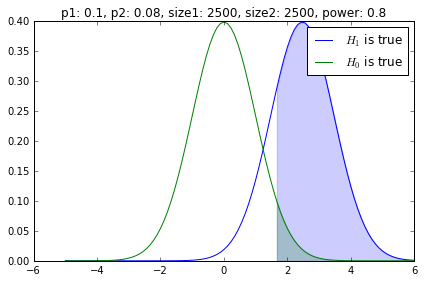

In [230]:
prob_b = 0.08
min_diff = 0.02
size_a = 2500
size_b = 2500

plot_power(min_diff, prob_b, size_a, size_b, significance = 0.05)


The shaded green area denotes the significance region, while the the shaded blue area denotes the power (note that it includes the shaded green area). Note that if we pick a smaller N, or a smaller probability difference between the control and experiment group, the power drops (the shaded blue area decreases), meaning that if there’s is in fact a change, there’s lesser percent chance that we’ll detect it.

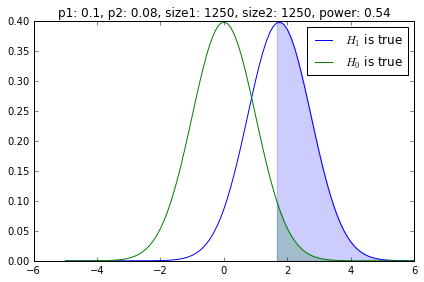

In [231]:
# smaller N
prob_b = 0.08
min_diff = 0.02
size_a = 1250
size_b = 1250

plot_power(min_diff, prob_b, size_a, size_b)

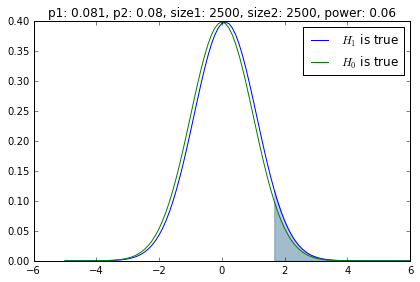

In [232]:
# smaller probability difference
prob_b = 0.08
min_diff = 0.001
size_a = 2500
size_b = 2500

plot_power(min_diff, prob_b, size_a, size_b)

The following link illustrates power for a two-sided hypothesis test for those interested. Youtube: Calculating Power and the Probability of a Type II Error (A Two-Tailed Example)

## Determine Sample Size

Say we've followed the rule of thumb and require the significance level to be 5% and the power to be 80%. This means we have now specified two key components of a power analysis.
A decision rule of when to reject the null hypothesis. We reject the null when the p-value is less than 5%.
Our tolerance for committing type 2 error (1−80%=20%).
To actually solve for the equation of finding the suitable sample size, we also need to specify the detectable difference, the level of impact we want to be able to detect with our test.
In order to explain the dynamics behind this, we'll return to the definition of power: the power is the probability of rejecting the null hypothesis when it is false. Hence for us to calculate the power, we need to define what "false" means to us in the context of the study. In other words, how much impact, i.e., difference between test and control, do we need to observe in order to reject the null hypothesis and conclude that the action worked?
Let's consider two illustrative examples: if we think that an event rate reduction of, say, $10^{-10}$ is enough to reject the null hypothesis, then we need a very large sample size to get a power of 80%. This is pretty easy to deduce from the charts above: if the difference in event rates between test and control is a small number like $10^{-10}$, the null and alternative probability distributions will be nearly indistinguishable. Hence we will need to increase the sample size in order to move the alternative distribution to the right and gain power. Conversely, if we only require a reduction of 0.02 in order to claim success, we can make do with a much smaller sample size.
The smaller the detectable difference, the larger the required sample size
Here's how we could conduct a power test in python:

In [238]:
import statsmodels.stats.api as sms


def compute_sample_size(prop1, min_diff, significance = 0.05, power = 0.8):
    """
    Computes the sample sized required for a two-proportion A/B test;
    result matches R's pwr.2p.test from the pwr package
    
    Parameters
    ----------
    prop1 : float
        The baseline proportion, e.g. conversion rate 
        
    min_diff : float
        Minimum detectable difference
        
    significance : float, default 0.05
        Often denoted as alpha. Governs the chance of a false positive.
        A significance level of 0.05 means that there is a 5% chance of
        a false positive. In other words, our confidence level is
        1 - 0.05 = 0.95
    
    power : float, default 0.8
        Often denoted as beta. Power of 0.80 means that there is an 80%
        chance that if there was an effect, we would detect it
        (or a 20% chance that we'd miss the effect)
        
    Returns
    -------
    sample_size : int
        Required sample size for each group of the experiment

    References
    ----------
    R pwr package's vignette
    - https://cran.r-project.org/web/packages/pwr/vignettes/pwr-vignette.html

    Stackoverflow: Is there a python (scipy) function to determine parameters
    needed to obtain a target power?
    - https://stackoverflow.com/questions/15204070/is-there-a-python-scipy-function-to-determine-parameters-needed-to-obtain-a-ta
    """
    prop2 = prop1 + min_diff
    effect_size = sms.proportion_effectsize(prop1, prop2)
    sample_size = sms.NormalIndPower().solve_power(
        effect_size, power = power, alpha = significance, ratio = 1)
    
    return sample_size

In [239]:
compute_sample_size(prop1 = 0.1, min_diff = 0.02)

3834.5957398840183

ote that the printed result is the sample size needed for each group!
Unlike the significance level and the power, there are no plug-and-play values we can use for the detectable difference. The key is to define what "pay off" means for the study at hand, which depends on what the adverse event is a well as the cost of the action. Two guiding principles:
Avoid wasteful sampling Let’s say it takes an absolute difference of 0.02 between test and control in order for the treatment to pay off. In this case, aiming for a 0.01 detectable difference would just lead to more precision than we really need. Why have the ability to detect 0.01 if we don’t really care about a 0.01 difference? In many cases, sampling for unnecessary precision can be costly and a waste of time
Avoid missed opportunities Conversely, if we are analyzing a sensitive metric where small changes can have a large impact e.g. email campaigns, we have to aim for a small detectable difference. If we choose an insufficient sample size, we may end up sitting on our hands and missing an opportunity (type 2 error)
Hence, choosing the minimum detectable difference should be a cross-functional analysis/discussion between the data scientist and the business stakeholder. Once there is a viable range for the detectable difference, we can evaluate the sample size required for each option. For example, let’s say that $p1=0.10$ and we want the detectable difference to be between 0.01 and 0.03. Clearly, we’d rather be able to detect a difference of 0.01, but it may be too costly and hence we want to evaluate more conservative options as well.

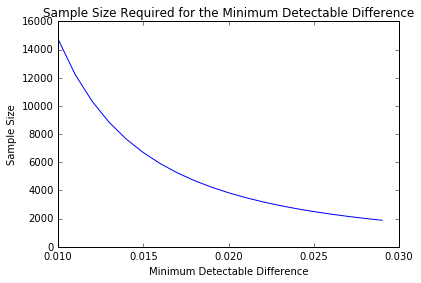

In [240]:
# calculate the the required sample size
# for a range of minimum detectable difference
sample_sizes = []
min_diffs = np.arange(0.01, 0.03, 0.001)
for min_diff in min_diffs:
    sample_size = compute_sample_size(prop1 = 0.1, min_diff = min_diff)
    sample_sizes.append(sample_size)

plt.plot(min_diffs, sample_sizes)
plt.title('Sample Size Required for the Minimum Detectable Difference')
plt.ylabel('Sample Size')
plt.xlabel('Minimum Detectable Difference')
plt.tight_layout()
plt.show()


From the graph, we can see that we need roughly 10x more observations to get a detectable difference of 0.01 compared to 0.03.
The following section is an alternative way of conducting a test statistic for proportional A/B test, feel free to skip it, it will not affect that understanding of later section.

# Alternative View of the Test Statistic

There are two types of the chi-squared test, goodness of fit and test of independence, but it is the latter which is useful for the case in question. The reason as to why a test of “independence” is applicable becomes clear by converting the contingency table into a probability matrix by dividing each element by the grand total of frequencies:


In [242]:
cols = ['not_converted', 'converted']
data[cols] = data[cols] / data[cols].values.sum()


In [246]:
data

,version,not_converted,converted
0,A,0.4514,0.0486
1,B,0.4473,0.0527


We will denote $V$ as the version of the web page ($a$ or $b$) and $C$ as the conversion result, $f$ (false did not convert) or $t$ (true did in fact convert). The table that we computed above, which this the data that we observed can then be translated into this form:
Version (V)	$f$ (false did not convert)	$t$ (true did in fact convert)
A	$P(V = a, C = f)$	$P(V = a, C = t)$
B	$P(V = b, C = f)$	$P(V = b, C = t)$
Now, our interest is whether the conversion $C$ depends on the page version $V$, and if it does, to learn which version converts better. In probability theory, the events $C$ and $V$ are said to be independent if the joint probability can be computed by $P(V, C) = P(V) \cdot P(C)$, where $P(V)$ and $P(C)$ are marginal probabilities of $V$ and $C$, respectively. It is straightforward to compute the marginal probabilities from row and column marginals:
$$P(V = a) = \frac{4514 + 486}{10000}  \hspace{1cm} P(V = b) = \frac{4473 + 527}{10000}$$$$P(C = f) = \frac{4514 + 4473}{10000} \hspace{1cm} P(V = b) = \frac{486 + 527}{10000}$$
The null hypothesis is that $V$ and $C$ are independent, in which case the elements of the matrix, a.k.a the distribution that we're expecting is equivalent to:
Version (V)	$f$ (false did not convert)	$t$ (true did in fact convert)
A	$P(V = a)P(C = f)$	$P(V = a)P(C = t)$
B	$P(V = b)P(C = f)$	$P(V = b)P(C = t)$
The conversion $C$ is said to be dependent on the version $V$ of the web site if this null hypothesis is rejected. Hence rejecting the null hypothesis means that one version is better at converting than the other. This is the reason why the test is on independence.
When dealing with counts and investigating how far the observed counts are from the expected counts, we use a test statistic called the chi-square test. The chi-squared test compares an observed distribution $O_{ij}$ to an expected distribution $E_{ij}$:
$$\begin{align}
\chi^2 = \sum_{i,j} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
\end{align}$$
It's calculated as the observed minus the expected for each cell squared divided by the expected counts, the division with the expected counts makes final result proportional to our expected frequency. After performing the computation for each cell, we want to sum this over all of the cells (levels of the categorical variable).
This $\chi^2$ probability distribution has only one parameter, the degrees of freedom. It influences the shape, the center and the spread of the chi-square distribution.